## Probabilistic Particle Collision Simulation 

Start count = 0 Red, 2 Green, 3 Blue


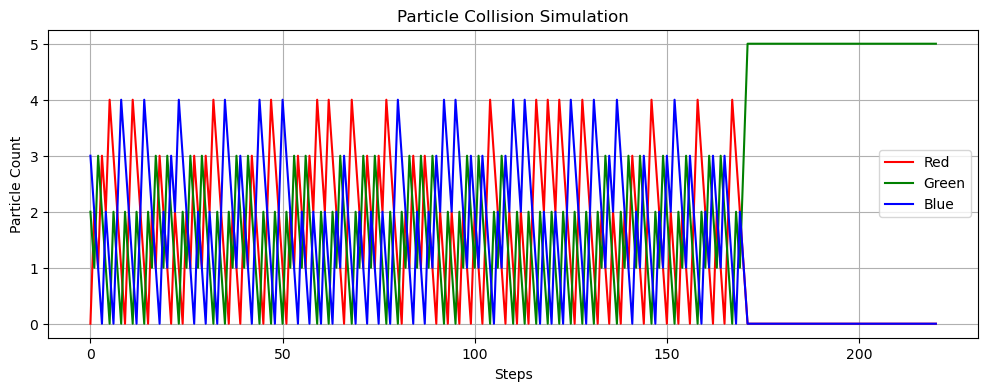

In [2]:
import random
import matplotlib.pyplot as plt

def simulate_collisions(r, g, b, steps):
    history = [(r, g, b)]
    extra_count = 0
    
    for _ in range(steps):
        total_pairs = (r * g) + (g * b) + (b * r)
        
        if total_pairs == 0:
            extra_steps = max((len(history)//10),50)
            extra_count += 1
            if extra_count >= extra_steps:
                break
            history.append((r, g, b))
            continue
        
        collisions = []
        weights = []
        
        if r > 0 and g > 0:
            collisions.append("RG")
            weights.append(r * g)
        if g > 0 and b > 0:
            collisions.append("GB")
            weights.append(g * b)
        if b > 0 and r > 0:
            collisions.append("BR")
            weights.append(b * r)
        
        if collisions:
            collision = random.choices(collisions, weights=weights)[0]
            
            if collision == "RG":
                r -= 1
                g -= 1
                b += 2
            elif collision == "GB":
                g -= 1
                b -= 1
                r += 2
            elif collision == "BR":
                b -= 1
                r -= 1
                g += 2
        
        history.append((r, g, b))
    
    return history

def plot_simulation(history):
    r_values, g_values, b_values = zip(*history)
    steps = range(len(history))

    plt.figure(figsize = (12,4))
    plt.plot(steps, r_values, label='Red', color='red')
    plt.plot(steps, g_values, label='Green', color='green')
    plt.plot(steps, b_values, label='Blue', color='blue')
    plt.xlabel("Steps")
    plt.ylabel("Particle Count")
    plt.title("Particle Collision Simulation")
    plt.legend()
    plt.grid(True)
    # plt.xticks(range(len(history)))  
    plt.yticks(range(min(min(r_values), min(g_values), min(b_values)), max(max(r_values), max(g_values), max(b_values)) + 1))
    plt.show()


r, g, b = 0, 2, 3 
steps = 1000000

print(f'Start count = {r} Red, {g} Green, {b} Blue')
history = simulate_collisions(r, g, b, steps)
plot_simulation(history)

## Simulating all triples for a given T-value

In [35]:
import random
from itertools import combinations_with_replacement

class bcolours:
    RED = '\033[31m'
    GREEN = '\033[32m'
    BLUE = '\033[34m'
    RESET = '\033[0m'

def simulate_collisions(r, g, b, steps=1000000):
    for _ in range(steps):
        total_pairs = (r * g) + (g * b) + (b * r)
        if total_pairs == 0:
            break
        
        collisions = []
        weights = []
        
        if r > 0 and g > 0:
            collisions.append("RG")
            weights.append(r * g)
        if g > 0 and b > 0:
            collisions.append("GB")
            weights.append(g * b)
        if b > 0 and r > 0:
            collisions.append("BR")
            weights.append(b * r)
        
        if not collisions:
            break
        
        collision = random.choices(collisions, weights=weights)[0]
        
        if collision == "RG":
            r -= 1
            g -= 1
            b += 2
        elif collision == "GB":
            g -= 1
            b -= 1
            r += 2
        elif collision == "BR":
            b -= 1
            r -= 1
            g += 2
    
    if r > 0 and g == 0 and b == 0:
        return f"{bcolours.RED}Red  {bcolours.RESET}"
    elif g > 0 and r == 0 and b == 0:
        return f"{bcolours.GREEN}Green{bcolours.RESET}"
    elif b > 0 and r == 0 and g == 0:
        return f"{bcolours.BLUE}Blue {bcolours.RESET}"
    else:
        return "None "

T = 7
numbers = range(0, T+1)

valid_triples = [triple for triple in combinations_with_replacement(numbers, 3) if sum(triple) == T]

results = {}
for triple in valid_triples:
    winners = [simulate_collisions(*triple) for _ in range(12)]
    results[triple] = winners

for triple, winners in results.items():
    coloured_triple = (
        f"{bcolours.RED}{triple[0]}{bcolours.RESET}, "
        f"{bcolours.GREEN}{triple[1]}{bcolours.RESET}, "
        f"{bcolours.BLUE}{triple[2]}{bcolours.RESET}")

    formatted_winners = " | ".join(winners)
    
    print(f"({coloured_triple}) -> {formatted_winners}")

(0, 0, 7) -> Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue 
(0, 1, 6) -> Green | Green | Green | Green | Green | Green | Green | Green | Green | Green | Green | Green
(0, 2, 5) -> Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red  
(0, 3, 4) -> Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue 
(1, 1, 5) -> Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue 
(1, 2, 4) -> Green | Green | Green | Green | Green | Green | Green | Green | Green | Green | Green | Green
(1, 3, 3) -> Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red   | Red  
(2, 2, 3) -> Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue  | Blue 


## Finding the average number of collisions before a system converges 

In [55]:
import random
import matplotlib.pyplot as plt

def simulate_collisions(r, g, b, max_steps):
    history = [(r, g, b)]
    steps_taken = 0
    
    for _ in range(max_steps):
        total_pairs = (r * g) + (g * b) + (b * r)
        
        if total_pairs == 0:
            break
        
        collisions = []
        weights = []
        
        if r > 0 and g > 0:
            collisions.append("RG")
            weights.append(r * g)
        if g > 0 and b > 0:
            collisions.append("GB")
            weights.append(g * b)
        if b > 0 and r > 0:
            collisions.append("BR")
            weights.append(b * r)
        
        if collisions:
            collision = random.choices(collisions, weights=weights)[0]
            
            if collision == "RG":
                r -= 1
                g -= 1
                b += 2
            elif collision == "GB":
                g -= 1
                b -= 1
                r += 2
            elif collision == "BR":
                b -= 1
                r -= 1
                g += 2
        
        history.append((r, g, b))
        steps_taken += 1
    
    return steps_taken, history

def run_multiple_simulations(r, g, b, max_steps, num_simulations):
    step_counts = []
    all_histories = []
    
    for _ in range(num_simulations):
        steps, history = simulate_collisions(r, g, b, max_steps)
        step_counts.append(steps)
        all_histories.append(history)
    
    average_steps = sum(step_counts) / len(step_counts)
    return average_steps, all_histories


r, g, b = 0, 2, 2  
steps = 1000000
num_simulations = 100000

average_collisions, histories = run_multiple_simulations(r, g, b, steps, num_simulations)
print(f'Average number of collisions before convergence for [{r},{g},{b}]: {average_collisions:.5f}')

Average number of collisions before convergence for [0,2,2]: 14.04032


## Finding the average number of collisions before convergence for all systems of a given T-value

In [8]:
import random
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

def simulate_collisions(r, g, b, max_steps):
    steps_taken = 0
    
    for _ in range(max_steps):
        total_pairs = (r * g) + (g * b) + (b * r)
        
        if total_pairs == 0:
            break
        
        collisions = []
        weights = []
        
        if r > 0 and g > 0:
            collisions.append("RG")
            weights.append(r * g)
        if g > 0 and b > 0:
            collisions.append("GB")
            weights.append(g * b)
        if b > 0 and r > 0:
            collisions.append("BR")
            weights.append(b * r)
        
        if collisions:
            collision = random.choices(collisions, weights=weights)[0]
            
            if collision == "RG":
                r -= 1
                g -= 1
                b += 2
            elif collision == "GB":
                g -= 1
                b -= 1
                r += 2
            elif collision == "BR":
                b -= 1
                r -= 1
                g += 2
        
        steps_taken += 1
    
    return steps_taken

def run_multiple_simulations(r, g, b, max_steps, num_simulations):
    step_counts = []
    
    for _ in range(num_simulations):
        steps = simulate_collisions(r, g, b, max_steps)
        step_counts.append(steps)
    
    average_steps = sum(step_counts) / len(step_counts)
    return average_steps

def find_average_steps_for_T(T, steps, num_simulations):
    if T % 3 == 0:
        print("You do not want to choose a multiple of 3!!")
        return
    
    numbers = range(0, T+1)
    valid_triples = [triple for triple in combinations_with_replacement(numbers, 3) if sum(triple) == T and triple != (0,0,T)]
    total_average_steps = 0
    for triple in valid_triples:
        avg_steps = run_multiple_simulations(*triple, steps, num_simulations)
        print(f"Initial counts {triple}: Average number of collisions = {avg_steps:.3f}")
        total_average_steps += avg_steps
    
    overall_average = total_average_steps / len(valid_triples) if valid_triples else 0
    print(f"Overall average number of collisions for T = {T}: {overall_average:.3f}")
    
T = 4
steps = 10000000000
num_simulations = 100000  

find_average_steps_for_T(T, steps, num_simulations)

Initial counts (0, 1, 3): Average number of collisions = 14.948
Initial counts (0, 2, 2): Average number of collisions = 14.038
Initial counts (1, 1, 2): Average number of collisions = 13.010
Overall average number of collisions for T = 4: 13.999


## Plotting the average number of collisions vs T-values

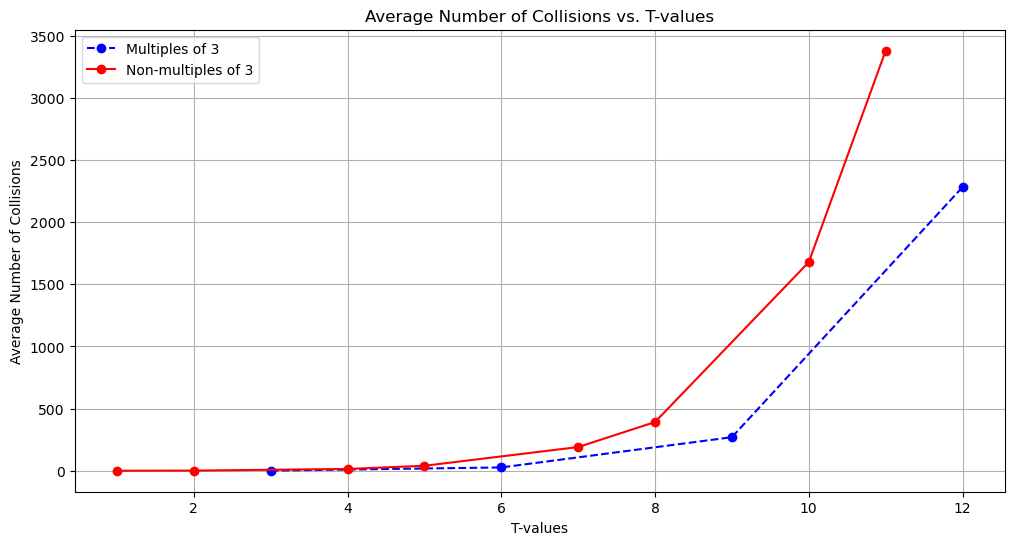

In [10]:
import random
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

def simulate_collisions(r, g, b, max_steps):
    steps_taken = 0
    
    for _ in range(max_steps):
        total_pairs = (r * g) + (g * b) + (b * r)
        
        if total_pairs == 0:
            break
        
        collisions = []
        weights = []
        
        if r > 0 and g > 0:
            collisions.append("RG")
            weights.append(r * g)
        if g > 0 and b > 0:
            collisions.append("GB")
            weights.append(g * b)
        if b > 0 and r > 0:
            collisions.append("BR")
            weights.append(b * r)
        
        if collisions:
            collision = random.choices(collisions, weights=weights)[0]
            
            if collision == "RG":
                r -= 1
                g -= 1
                b += 2
            elif collision == "GB":
                g -= 1
                b -= 1
                r += 2
            elif collision == "BR":
                b -= 1
                r -= 1
                g += 2
        
        steps_taken += 1
    
    return steps_taken

def run_multiple_simulations(r, g, b, max_steps, num_simulations):
    step_counts = []
    
    for _ in range(num_simulations):
        steps = simulate_collisions(r, g, b, max_steps)
        step_counts.append(steps)
    
    average_steps = sum(step_counts) / len(step_counts)
    return average_steps

def find_average_steps_for_T_range(max_T, steps, num_simulations):
    T_values_multiples_3 = []
    avg_steps_multiples_3 = []
    T_values_non_multiples_3 = []
    avg_steps_non_multiples_3 = []
    
    for T in range(1, max_T + 1):
        if T % 3 == 0:
            valid_triples = [triple for triple in combinations_with_replacement(range(T+1), 3)
                             if sum(triple) == T and triple[0] % 3 == triple[1] % 3 == triple[2] % 3 and triple != (0, 0, T)]
        else:
            valid_triples = [triple for triple in combinations_with_replacement(range(T+1), 3)
                             if sum(triple) == T and triple != (0, 0, T)]
        
        total_average_steps = 0
        for triple in valid_triples:
            avg_steps = run_multiple_simulations(*triple, steps, num_simulations)
            total_average_steps += avg_steps
        
        overall_average = total_average_steps / len(valid_triples) if valid_triples else 0
        
        if T % 3 == 0:
            T_values_multiples_3.append(T)
            avg_steps_multiples_3.append(overall_average)
        else:
            T_values_non_multiples_3.append(T)
            avg_steps_non_multiples_3.append(overall_average)
    
    plt.figure(figsize=(12, 6))
    plt.plot(T_values_multiples_3, avg_steps_multiples_3, marker='o', linestyle='--', color='b', label="Multiples of 3")
    plt.plot(T_values_non_multiples_3, avg_steps_non_multiples_3, marker='o', linestyle='-', color='r', label="Non-multiples of 3")
    plt.xlabel("T-values")
    plt.ylabel("Average Number of Collisions")
    plt.title("Average Number of Collisions vs. T-values")
    plt.legend()
    plt.grid(True)
    plt.show()

max_T = 12  
steps = 1000000000
num_simulations = 1000

find_average_steps_for_T_range(max_T, steps, num_simulations)

## Fitting an exponential curve to the Average number of collisions vs. T-values

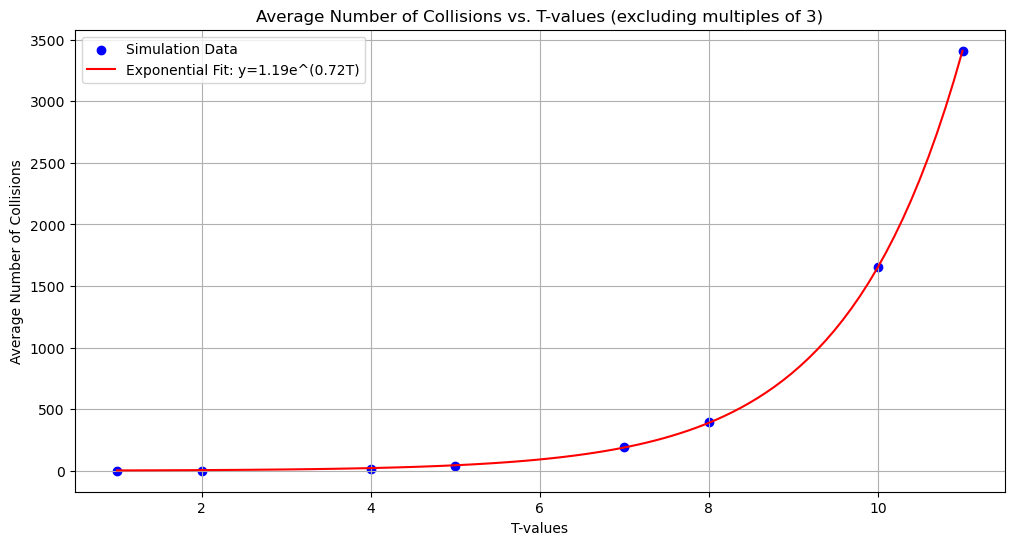

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement
from scipy.optimize import curve_fit

def simulate_collisions(r, g, b, max_steps):
    steps_taken = 0
    
    for _ in range(max_steps):
        total_pairs = (r * g) + (g * b) + (b * r)
        
        if total_pairs == 0:
            break
        
        collisions = []
        weights = []
        
        if r > 0 and g > 0:
            collisions.append("RG")
            weights.append(r * g)
        if g > 0 and b > 0:
            collisions.append("GB")
            weights.append(g * b)
        if b > 0 and r > 0:
            collisions.append("BR")
            weights.append(b * r)
        
        if collisions:
            collision = random.choices(collisions, weights=weights)[0]
            
            if collision == "RG":
                r -= 1
                g -= 1
                b += 2
            elif collision == "GB":
                g -= 1
                b -= 1
                r += 2
            elif collision == "BR":
                b -= 1
                r -= 1
                g += 2
        
        steps_taken += 1
    
    return steps_taken

def run_multiple_simulations(r, g, b, max_steps, num_simulations):
    step_counts = [simulate_collisions(r, g, b, max_steps) for _ in range(num_simulations)]
    return sum(step_counts) / len(step_counts)

def exponential_fit(T, a, b):
    return a * np.exp(b * T)

def find_average_steps_for_T_range(max_T, steps, num_simulations):
    T_values = []
    avg_steps_values = []
    
    for T in range(1, max_T + 1):
        if T % 3 == 0:
            continue
        
        numbers = range(0, T+1)
        valid_triples = [triple for triple in combinations_with_replacement(numbers, 3) if sum(triple) == T and triple != (0,0,T)]
        
        total_average_steps = sum(run_multiple_simulations(*triple, steps, num_simulations) for triple in valid_triples)
        overall_average = total_average_steps / len(valid_triples) if valid_triples else 0
        
        T_values.append(T)
        avg_steps_values.append(overall_average)
    
    plt.figure(figsize=(12, 6))
    plt.scatter(T_values, avg_steps_values, color='b', label='Simulation Data')
    
    popt, _ = curve_fit(exponential_fit, np.array(T_values), np.array(avg_steps_values), p0=(1, 0.75))
    fitted_T_values = np.linspace(min(T_values), max(T_values), 100)
    fitted_steps_values = exponential_fit(fitted_T_values, *popt)
    
    plt.plot(fitted_T_values, fitted_steps_values, 'r-', label=f'Exponential Fit: y={popt[0]:.2f}e^({popt[1]:.2f}T)')
    plt.xlabel("T-values")
    plt.ylabel("Average Number of Collisions")
    plt.title("Average Number of Collisions vs. T-values (excluding multiples of 3)")
    plt.legend()
    plt.grid(True)
    plt.show()

max_T = 11 
steps = 1000000000
num_simulations = 1000

find_average_steps_for_T_range(max_T, steps, num_simulations)

## Our original collision simulation with variable weights for each type of collision

Start count = 20 Red, 20 Green, 20 Blue
Likelihood weightings: Green + Blue = 5.0, Blue + Red = 3.0, Red + Green = 1.0


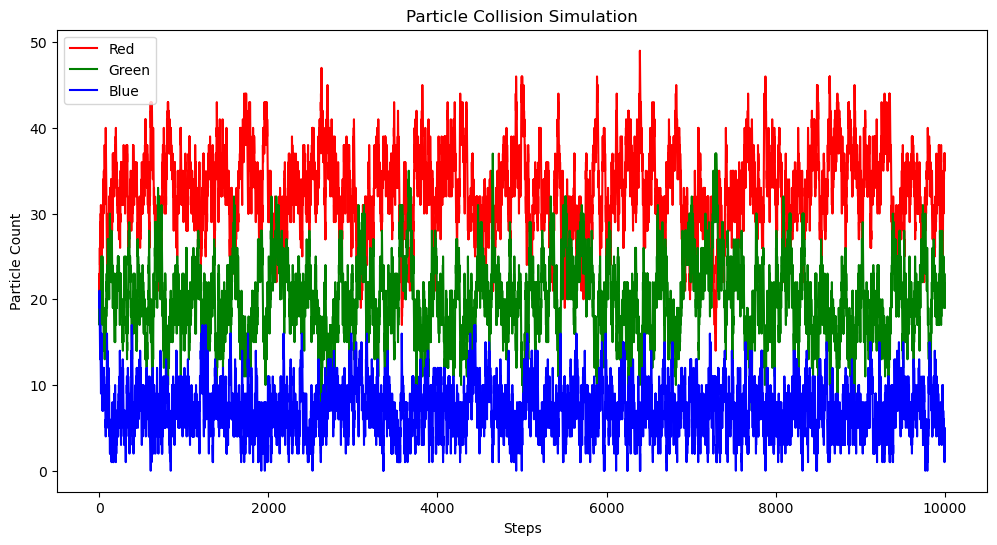

In [14]:
import random
import matplotlib.pyplot as plt

def simulate_collisions(r, g, b, steps, likelihoods):
    history = [(r, g, b)]
    
    for _ in range(steps):
        total_pairs = (r * g) + (g * b) + (b * r)
        
        if total_pairs == 0:
            break
        
        collisions = []
        weights = []
        
        if r > 0 and g > 0:
            collisions.append("RG")
            weights.append(r * g * likelihoods["RG"])
        if g > 0 and b > 0:
            collisions.append("GB")
            weights.append(g * b * likelihoods["GB"])
        if b > 0 and r > 0:
            collisions.append("BR")
            weights.append(b * r * likelihoods["BR"])
        
        if collisions:
            collision = random.choices(collisions, weights=weights)[0]
         
            if collision == "RG":
                r -= 1
                g -= 1
                b += 2
            elif collision == "GB":
                g -= 1
                b -= 1
                r += 2
            elif collision == "BR":
                b -= 1
                r -= 1
                g += 2
        
        history.append((r, g, b))
    
    return history

def plot_simulation(history):
    r_values, g_values, b_values = zip(*history)
    steps = range(len(history))

    plt.figure(figsize=(12, 6))
    plt.plot(steps, r_values, label='Red', color='red')
    plt.plot(steps, g_values, label='Green', color='green')
    plt.plot(steps, b_values, label='Blue', color='blue')
    plt.xlabel("Steps")
    plt.ylabel("Particle Count")
    plt.title("Particle Collision Simulation")
    plt.legend()
    plt.show()

r, g, b = 20, 20, 20  
steps = 10000
likelihoods = {"GB": 5.0,  "BR": 3.0, "RG": 1.0}

print(f'Start count = {r} Red, {g} Green, {b} Blue')
print(f'Likelihood weightings: Green + Blue = {likelihoods["GB"]}, Blue + Red = {likelihoods["BR"]}, Red + Green = {likelihoods["RG"]}')

history = simulate_collisions(r, g, b, steps, likelihoods)
plot_simulation(history)

## Calculating the equilibrium of a high population system

Start count = 3467 Red, 1015 Green, 4296 Blue
Likelihood weightings: Green + Blue = 31.4, Blue + Red = 26.5, Red + Green = 9.2


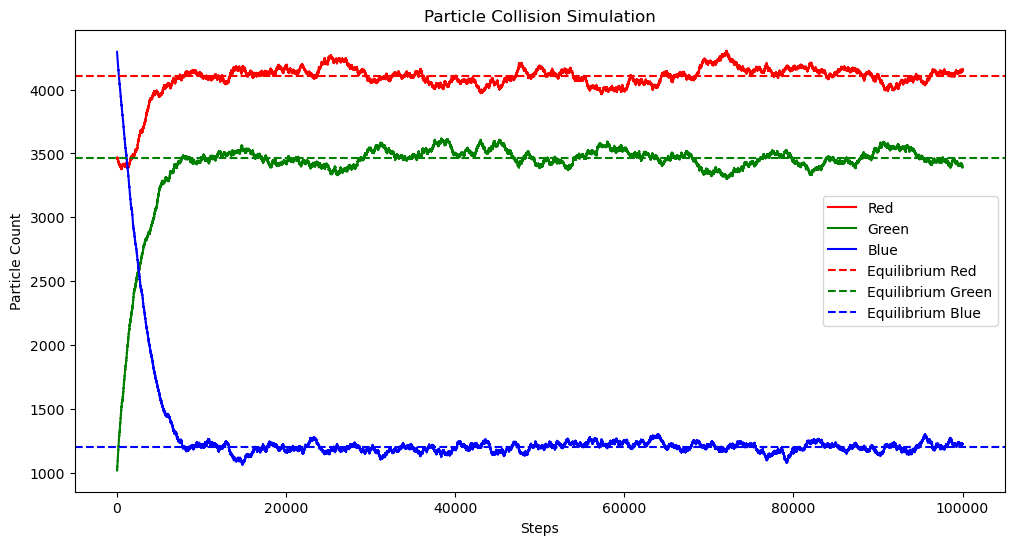

In [16]:
import random
import matplotlib.pyplot as plt

def simulate_collisions(r, g, b, steps, likelihoods):
    history = [(r, g, b)]
    
    for _ in range(steps):
        total_pairs = (r * g) + (g * b) + (b * r)
        
        if total_pairs == 0:
            break
        
        collisions = []
        weights = []
        
        if r > 0 and g > 0:
            collisions.append("RG")
            weights.append(r * g * likelihoods["RG"])
        if g > 0 and b > 0:
            collisions.append("GB")
            weights.append(g * b * likelihoods["GB"])
        if b > 0 and r > 0:
            collisions.append("BR")
            weights.append(b * r * likelihoods["BR"])
        
        if collisions:
            collision = random.choices(collisions, weights=weights)[0]
            
            if collision == "RG":
                r -= 1
                g -= 1
                b += 2
            elif collision == "GB":
                g -= 1
                b -= 1
                r += 2
            elif collision == "BR":
                b -= 1
                r -= 1
                g += 2
        
        history.append((r, g, b))
    
    return history

def plot_simulation(history,likelihoods,T):
    r_values, g_values, b_values = zip(*history)
    steps = range(len(history))

    plt.figure(figsize=(12, 6))
    plt.plot(steps, r_values, label='Red', color='red')
    plt.plot(steps, g_values, label='Green', color='green')
    plt.plot(steps, b_values, label='Blue', color='blue')

    likelihood_total = likelihoods["GB"] + likelihoods["BR"] + likelihoods["RG"]

    red_final = (likelihoods["GB"]/likelihood_total) * T 
    green_final = (likelihoods["BR"]/likelihood_total) * T
    blue_final = (likelihoods["RG"]/likelihood_total) * T
    
    plt.axhline(y=red_final, color='red', linestyle='dashed', label='Equilibrium Red')
    plt.axhline(y=green_final, color='green', linestyle='dashed', label='Equilibrium Green')
    plt.axhline(y=blue_final, color='blue', linestyle='dashed', label='Equilibrium Blue')
    
    plt.xlabel("Steps")
    plt.ylabel("Particle Count")
    plt.title("Particle Collision Simulation")
    plt.legend()
    plt.show()


r, g, b = 3467, 1015, 4296 
T = r + g + b
steps = 100000
likelihoods = {"GB": 31.4,  "BR": 26.5, "RG": 9.2}

print(f'Start count = {r} Red, {g} Green, {b} Blue')
print(f'Likelihood weightings: Green + Blue = {likelihoods["GB"]}, Blue + Red = {likelihoods["BR"]}, Red + Green = {likelihoods["RG"]}')

history = simulate_collisions(r, g, b, steps, likelihoods)
plot_simulation(history,likelihoods,T)

## Physically realistic simulation

Start count = 40 Red, 40 Green, 40 Blue
Red radius = 2, Green radius = 8, Blue radius = 32
Red speed = 7, Green speed = 7, Blue speed = 7


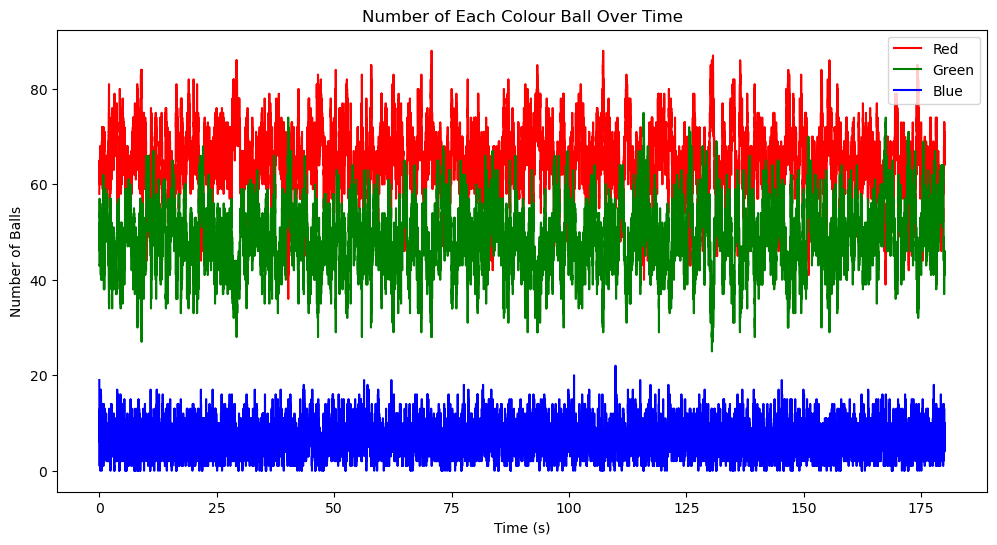

In [43]:
import pygame
import math
import random
import time
import matplotlib.pyplot as plt

pygame.init()

WIDTH, HEIGHT = 700, 700
WHITE = (255, 255, 255)
RED   = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE  = (0, 0, 255)
BLACK = (0, 0, 0)
FPS = 120

num_red   = 40
num_green = 40
num_blue  = 40

BALL_RADIUS_RED   = 2
BALL_RADIUS_GREEN = 8
BALL_RADIUS_BLUE  = 32

BALL_SPEED_RED   = 7
BALL_SPEED_GREEN = 7
BALL_SPEED_BLUE  = 7

SIMULATION_TIME = 180

print(f'Start count = {num_red} Red, {num_green} Green, {num_blue} Blue')
print(f'Red radius = {BALL_RADIUS_RED}, Green radius = {BALL_RADIUS_GREEN}, Blue radius = {BALL_RADIUS_BLUE}')
print(f'Red speed = {BALL_SPEED_RED}, Green speed = {BALL_SPEED_GREEN}, Blue speed = {BALL_SPEED_BLUE}')

time_data = []
red_data = []
blue_data = []
green_data = []

screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Particle Collision Simulation")
clock = pygame.time.Clock()
font = pygame.font.SysFont("arial", 30)

def generate_velocity(speed):
    angle = random.uniform(0, 2 * math.pi)
    return speed * math.cos(angle), speed * math.sin(angle)

def update_speed(ball):
    if ball['vx'] == 0 and ball['vy'] == 0:
        angle = random.uniform(0, 2 * math.pi)
    else:
        angle = math.atan2(ball['vy'], ball['vx'])
    if ball['colour'] == RED:
        speed = BALL_SPEED_RED
    elif ball['colour'] == GREEN:
        speed = BALL_SPEED_GREEN
    elif ball['colour'] == BLUE:
        speed = BALL_SPEED_BLUE
    ball['vx'] = speed * math.cos(angle)
    ball['vy'] = speed * math.sin(angle)

def check_collision(x1, y1, x2, y2, r1, r2):
    return math.hypot(x2 - x1, y2 - y1) <= (r1 + r2)

def change_to_third_colour(colour1, colour2):
    if {colour1, colour2} == {RED, BLUE}:
        return GREEN, BALL_RADIUS_GREEN, BALL_SPEED_GREEN
    elif {colour1, colour2} == {RED, GREEN}:
        return BLUE, BALL_RADIUS_BLUE, BALL_SPEED_BLUE
    elif {colour1, colour2} == {BLUE, GREEN}:
        return RED, BALL_RADIUS_RED, BALL_SPEED_RED
    return colour1, BALL_RADIUS_RED, BALL_SPEED_RED

def handle_elastic_collision(ball1, ball2):
    dx = ball1['x'] - ball2['x']
    dy = ball1['y'] - ball2['y']
    distance = math.hypot(dx, dy)
    if distance == 0:
        angle = random.uniform(0, 2 * math.pi)
        nx, ny = math.cos(angle), math.sin(angle)
    else:
        nx, ny = dx / distance, dy / distance

    dvx = ball1['vx'] - ball2['vx']
    dvy = ball1['vy'] - ball2['vy']
    if dvx * nx + dvy * ny >= 0:
        return

    v1_dot = ball1['vx'] * nx + ball1['vy'] * ny
    v2_dot = ball2['vx'] * nx + ball2['vy'] * ny

    v1t_x = ball1['vx'] - v1_dot * nx
    v1t_y = ball1['vy'] - v1_dot * ny
    v2t_x = ball2['vx'] - v2_dot * nx
    v2t_y = ball2['vy'] - v2_dot * ny

    ball1['vx'] = v1t_x + v2_dot * nx
    ball1['vy'] = v1t_y + v2_dot * ny
    ball2['vx'] = v2t_x + v1_dot * nx
    ball2['vy'] = v2t_y + v1_dot * ny

def adjust_position_after_collision(ball, other_ball):
    dx = ball['x'] - other_ball['x']
    dy = ball['y'] - other_ball['y']
    distance = math.hypot(dx, dy)
    
    if distance == 0:
        angle = random.uniform(0, 2 * math.pi)
        dx, dy = math.cos(angle), math.sin(angle)
        distance = 1.0
        
    overlap = ball['radius'] + other_ball['radius'] - distance
    if overlap > 0:
        norm_dx, norm_dy = dx / distance, dy / distance
        separation = overlap / 2 + 1 
        ball['x'] += norm_dx * separation
        ball['y'] += norm_dy * separation
        other_ball['x'] -= norm_dx * separation
        other_ball['y'] -= norm_dy * separation

        ball['x'] = max(ball['radius'], min(WIDTH - ball['radius'], ball['x']))
        ball['y'] = max(ball['radius'], min(HEIGHT - ball['radius'], ball['y']))
        other_ball['x'] = max(other_ball['radius'], min(WIDTH - other_ball['radius'], other_ball['x']))
        other_ball['y'] = max(other_ball['radius'], min(HEIGHT - other_ball['radius'], other_ball['y']))

def log_data(time_elapsed, red_count, blue_count, green_count):
    time_data.append(time_elapsed)
    red_data.append(red_count)
    blue_data.append(blue_count)
    green_data.append(green_count)


balls = []
colours = [RED] * num_red + [GREEN] * num_green + [BLUE] * num_blue
random.shuffle(colours)

for colour in colours:
    if colour == RED:
        radius = BALL_RADIUS_RED
        speed = BALL_SPEED_RED
    elif colour == GREEN:
        radius = BALL_RADIUS_GREEN
        speed = BALL_SPEED_GREEN
    elif colour == BLUE:
        radius = BALL_RADIUS_BLUE
        speed = BALL_SPEED_BLUE
    x = random.randint(radius, WIDTH - radius)
    y = random.randint(radius, HEIGHT - radius)
    vx, vy = generate_velocity(speed)
    balls.append({'colour': colour, 'x': x, 'y': y, 'vx': vx, 'vy': vy, 'radius': radius})

start_time = time.time()
running = True

final_colour = None 

collision_count = 0

while running:
    screen.fill(WHITE)
    elapsed_time = time.time() - start_time
    time_text = font.render(f"Time: {elapsed_time:.1f}s", True, BLACK)
    screen.blit(time_text, (WIDTH - 200, 10))

    for ball in balls:
        ball['x'] += ball['vx']
        ball['y'] += ball['vy']

        if ball['x'] - ball['radius'] <= 0:
            ball['x'] = ball['radius']
            ball['vx'] = abs(ball['vx'])
        elif ball['x'] + ball['radius'] >= WIDTH:
            ball['x'] = WIDTH - ball['radius']
            ball['vx'] = -abs(ball['vx'])
        
        if ball['y'] - ball['radius'] <= 0:
            ball['y'] = ball['radius']
            ball['vy'] = abs(ball['vy'])
        elif ball['y'] + ball['radius'] >= HEIGHT:
            ball['y'] = HEIGHT - ball['radius']
            ball['vy'] = -abs(ball['vy'])

    new_balls = []
    removed_indices = set()
    for i in range(len(balls)):
        if i in removed_indices:
            continue
        for j in range(i + 1, len(balls)):
            if j in removed_indices:
                continue
            ball1 = balls[i]
            ball2 = balls[j]
            if check_collision(ball1['x'], ball1['y'], ball2['x'], ball2['y'],
                               ball1['radius'], ball2['radius']):
                collision_count += 1
                handle_elastic_collision(ball1, ball2)
                adjust_position_after_collision(ball1, ball2)
                
                if ball1['colour'] == ball2['colour']:
                    update_speed(ball1)
                    update_speed(ball2)
                    
                else:
                    new_colour, new_radius, new_speed = change_to_third_colour(ball1['colour'], ball2['colour'])
                    vx1, vy1 = generate_velocity(new_speed)
                    vx2, vy2 = generate_velocity(new_speed)
                    new_balls.append({'colour': new_colour, 'x': ball1['x'], 'y': ball1['y'],
                                      'vx': vx1, 'vy': vy1, 'radius': new_radius})
                    new_balls.append({'colour': new_colour, 'x': ball2['x'], 'y': ball2['y'],
                                      'vx': vx2, 'vy': vy2, 'radius': new_radius})
                    removed_indices.add(i)
                    removed_indices.add(j)
                    break
                    
    balls = [ball for index, ball in enumerate(balls) if index not in removed_indices]
    balls.extend(new_balls)

    red_count = sum(1 for ball in balls if ball['colour'] == RED)
    blue_count = sum(1 for ball in balls if ball['colour'] == BLUE)
    green_count = sum(1 for ball in balls if ball['colour'] == GREEN)
    log_data(elapsed_time, red_count, blue_count, green_count)

    for ball in balls:
        pygame.draw.circle(screen, ball['colour'], (int(ball['x']), int(ball['y'])), ball['radius'])

    count_text = f"Red: {red_count}  Blue: {blue_count}  Green: {green_count}"
    text_surface = font.render(count_text, True, BLACK)
    screen.blit(text_surface, (10, 10))

    pygame.display.flip()
    clock.tick(FPS)

    for event in pygame.event.get():
        if event.type == pygame.QUIT or (event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE):
            running = False

    unique_colours = {ball['colour'] for ball in balls}
    if len(unique_colours) == 1:
        final_colour = unique_colours.pop()
        running = False
        end_time = time.time()

    if elapsed_time >= SIMULATION_TIME:
        running = False

pygame.quit()

if final_colour is not None:
    if final_colour == RED:
        final_colour_print = "Red"
    elif final_colour == GREEN:
        final_colour_print = "Green"
    elif final_colour == BLUE:
        final_colour_print = "Blue"
    else:
        final_colour_print = "None"
    print(f"All balls became {final_colour_print} after {end_time - start_time:.2f} seconds.")

plt.figure(figsize=(12, 6))
plt.plot(time_data, red_data, label="Red", color='red')
plt.plot(time_data, green_data, label="Green", color='green')
plt.plot(time_data, blue_data, label="Blue", color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Number of Balls")
plt.title("Number of Each Colour Ball Over Time")
plt.legend()
plt.show()

## Deriving weights from experimental data based on above simulation

Estimated W(GB): 63.5
Estimated W(BR): 50.0
Estimated W(GR): 6.5

Simplified ratio: 127:100:13

Start count = 40 Red, 40 Green, 40 Blue
Likelihood weightings: Green + Blue = 127, Blue + Red = 100, Red + Green = 13


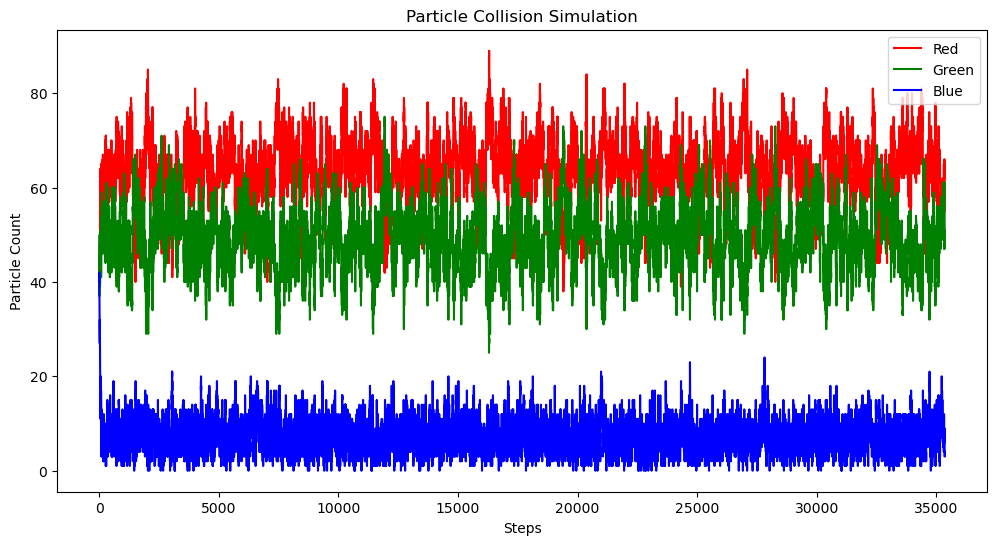

In [47]:
import numpy as np
import math

last_60_seconds = max(time_data) - 60
indices = [i for i, t in enumerate(time_data) if t >= last_60_seconds]

avg_red = np.mean([red_data[i] for i in indices])
avg_green = np.mean([green_data[i] for i in indices])
avg_blue = np.mean([blue_data[i] for i in indices])

W_GB = avg_red
W_BR = avg_green
W_GR = avg_blue

W_GB_rounded = round(W_GB * 2) / 2
W_BR_rounded = round(W_BR * 2) / 2
W_GR_rounded = round(W_GR * 2) / 2

W_GB_int = round(W_GB_rounded * 2)
W_BR_int = round(W_BR_rounded * 2)
W_GR_int = round(W_GR_rounded * 2)

g = math.gcd(W_GB_int, math.gcd(W_BR_int, W_GR_int))/2
W_GB_final = int(W_GB_rounded / g)
W_BR_final = int(W_BR_rounded / g)
W_GR_final = int(W_GR_rounded / g)

print(f"Estimated W(GB): {W_GB_rounded}")
print(f"Estimated W(BR): {W_BR_rounded}")
print(f"Estimated W(GR): {W_GR_rounded}")
print('')
print(f"Simplified ratio: {W_GB_final}:{W_BR_final}:{W_GR_final}")

import random
import matplotlib.pyplot as plt

def simulate_collisions(r, g, b, steps, likelihoods=None):
    history = [(r, g, b)]
    
    for _ in range(steps):
        total_pairs = (r * g) + (g * b) + (b * r)
        
        if total_pairs == 0:
            break
    
        collisions = []
        weights = []
        
        if r > 0 and g > 0:
            collisions.append("RG")
            weights.append(r * g * likelihoods["RG"])
        if g > 0 and b > 0:
            collisions.append("GB")
            weights.append(g * b * likelihoods["GB"])
        if b > 0 and r > 0:
            collisions.append("BR")
            weights.append(b * r * likelihoods["BR"])
        
        if collisions:
            collision = random.choices(collisions, weights=weights)[0]
            
            if collision == "RG":
                r -= 1
                g -= 1
                b += 2
            elif collision == "GB":
                g -= 1
                b -= 1
                r += 2
            elif collision == "BR":
                b -= 1
                r -= 1
                g += 2
        
        history.append((r, g, b))
    
    return history

def plot_simulation(history):
    r_values, g_values, b_values = zip(*history)
    steps = range(len(history))

    plt.figure(figsize=(12, 6))
    plt.plot(steps, r_values, label='Red', color='red')
    plt.plot(steps, g_values, label='Green', color='green')
    plt.plot(steps, b_values, label='Blue', color='blue')
    plt.xlabel("Steps")
    plt.ylabel("Particle Count")
    plt.title("Particle Collision Simulation")
    plt.legend()
    plt.show()

r, g, b = num_red, num_green, num_blue 
steps = collision_count // 3
likelihoods = {"GB": W_GB_final,  "BR": W_BR_final, "RG": W_GR_final}

print('')
print(f'Start count = {r} Red, {g} Green, {b} Blue')
print(f'Likelihood weightings: Green + Blue = {likelihoods["GB"]}, Blue + Red = {likelihoods["BR"]}, Red + Green = {likelihoods["RG"]}')

history = simulate_collisions(r, g, b, steps, likelihoods)
plot_simulation(history)